<a href="https://colab.research.google.com/github/inesfrsantos/MachineLearning/blob/main/Machine_Learning_Final_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Preprocessing
## Load needed packages and Data

In [6]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import hashlib

In [7]:
# Data is stored in a GitHub Repository
!git clone https://github.com/inesfrsantos/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 72039, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 72039 (delta 12), reused 17 (delta 7), pack-reused 72008
Receiving objects: 100% (72039/72039), 135.56 MiB | 30.74 MiB/s, done.
Resolving deltas: 100% (16605/16605), done.
Updating files: 100% (177774/177774), done.


In [8]:
!ls

MachineLearning  sample_data


In [ ]:
path = "/content/MachineLearning/Dataset/ArASL_Database_54K_Final"

In [ ]:
# create empty lists to store image file paths, images, and labels
img_path = []
images = []
labels = []

# loop through each folder in the path
for folder_name in os.listdir(path):
    # create the full path to the folder
    folder_path = os.path.join(path, folder_name)
    # skip any non-directory files
    if not os.path.isdir(folder_path):
        continue
    # loop through each file in the folder
    for file_name in os.listdir(folder_path):
        # check if the file is a jpg, png, JPG, or PNG file
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".JPG") or file_name.endswith(".PNG"):
            # create the full path to the image file
            image_path = os.path.join(folder_path, file_name)
            # check if the file is a regular file
            if os.path.isfile(image_path):
                # open the image file and convert it to grayscale
                image = Image.open(image_path).convert('L')
                # append the image file path, image, and label to their respective lists
                images.append(image)
                labels.append(folder_name)
                img_path.append(image_path)

# create a pandas dataframe with the image file paths, images, and labels as columns
df = pd.DataFrame({'img_path': img_path, 'image': images, 'label': labels})

## Exploratory Analysis

In [ ]:
#get the total number of pictures in the dataset
num_pics = len(df)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

54049 

Number and Percentage of pictures per Label:

ain: 2114 (3.91%)
ghain: 1977 (3.66%)
fa: 1955 (3.62%)
saad: 1895 (3.51%)
taa: 1838 (3.40%)
laam: 1832 (3.39%)
nun: 1819 (3.37%)
ta: 1816 (3.36%)
toot: 1791 (3.31%)
bb: 1791 (3.31%)
kaaf: 1774 (3.28%)
thaa: 1766 (3.27%)
meem: 1765 (3.27%)
la: 1746 (3.23%)
dha: 1723 (3.19%)
ya: 1722 (3.19%)
gaaf: 1705 (3.15%)
aleff: 1672 (3.09%)
dhad: 1670 (3.09%)
ra: 1659 (3.07%)
seen: 1638 (3.03%)
dal: 1634 (3.02%)
khaa: 1607 (2.97%)
ha: 1592 (2.95%)
thal: 1582 (2.93%)
jeem: 1552 (2.87%)
haa: 1526 (2.82%)
sheen: 1507 (2.79%)
zay: 1374 (2.54%)
waw: 1371 (2.54%)
al: 1343 (2.48%)
yaa: 1293 (2.39%)


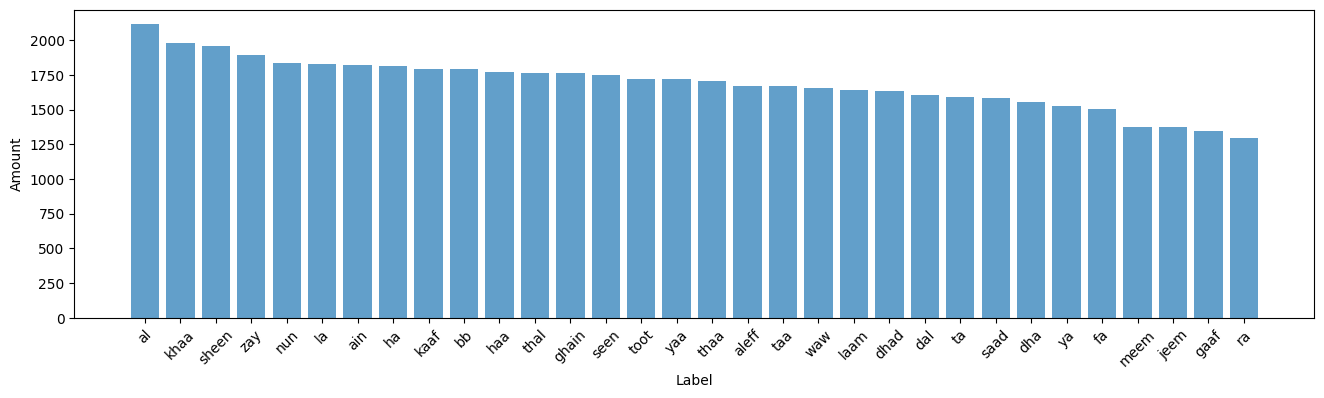

In [ ]:
# plot the count of images per Label
# Get unique labels from the dataframe
Label = df['label'].unique()

# Set the size of the plot
plt.figure(figsize=(16,4))

# Create a bar chart of label counts
plt.bar(range(len(label_counts)), label_counts, alpha = .7)

# Set x-axis tick marks and labels to the unique labels
plt.xticks(range(len(label_counts)), Label, rotation = 45)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Amount")

# Display the plot
plt.show()

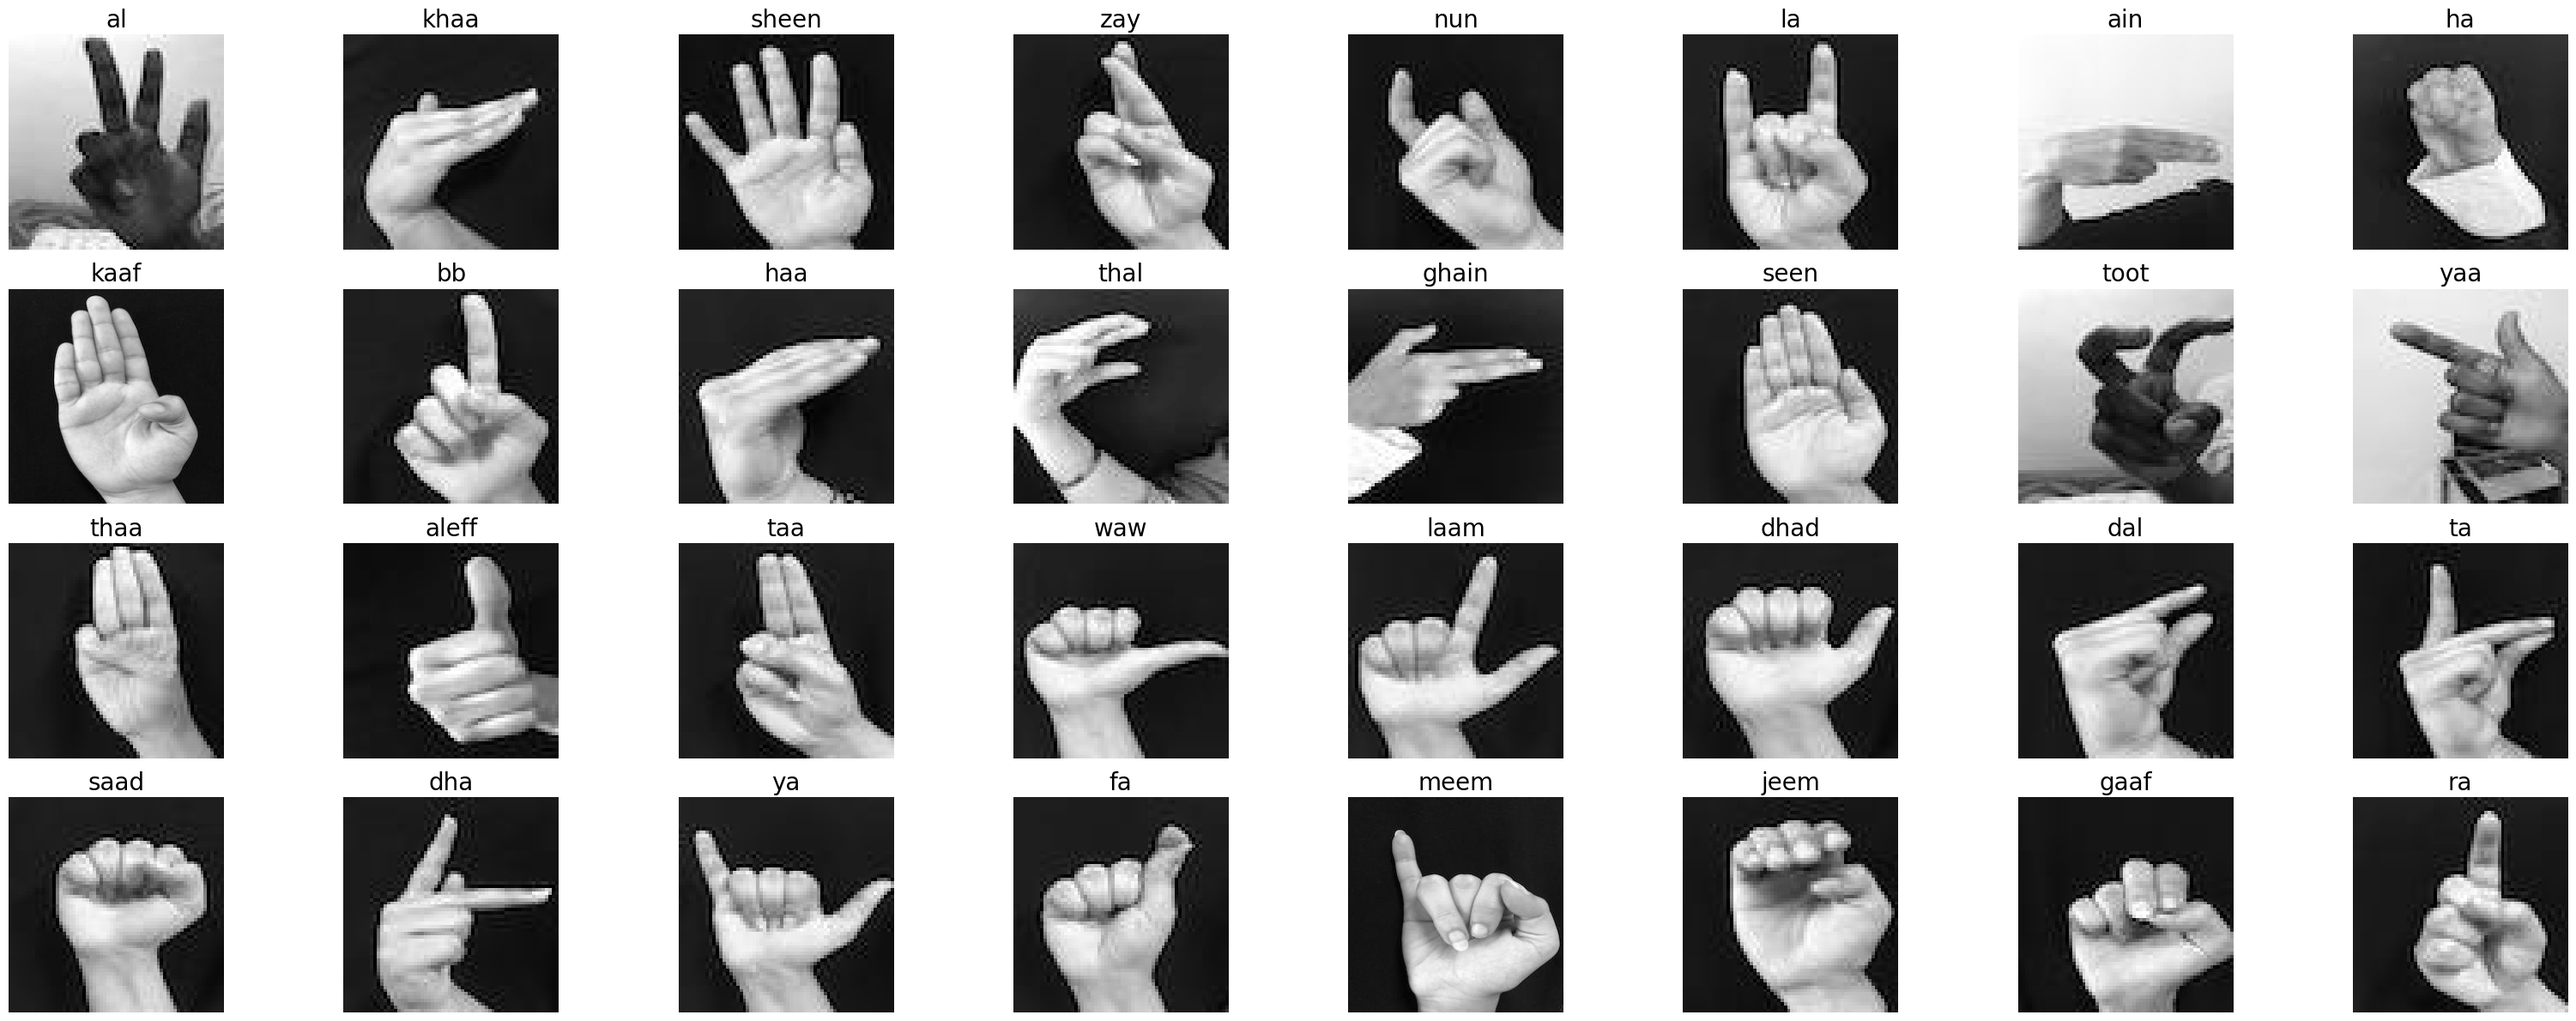

In [ ]:
# Plot Examples of all signs with theri best quality
# Get one image for each label
label_to_image = {}
for label in df['label'].unique():
    label_df = df[df['label'] == label]
    variances = [np.var(np.array(image)) for image in label_df['image']]
    max_idx = np.argmax(variances)
    label_to_image[label] = label_df.iloc[max_idx]['image']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

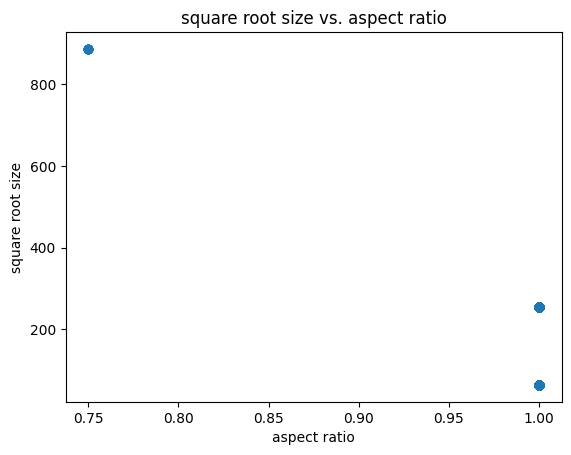

In [ ]:
# plot the square root size vs aspect ratio to see the distribution of sizes
# first calculate the square root size and the aspect ratio
square_root_size = []
aspect_ratio = []
for image in df['image']:
  #size of the images in pixels
  width, height = image.size
  
  #calculate the square root size
  sqrt_size = (width * height) ** 0.5
  square_root_size.append(sqrt_size)

  #cxalculate the aspect_ration
  aspt_rt = width/height
  aspect_ratio.append(aspt_rt)

# plot the data
fig, ax = plt.subplots()
ax.scatter(aspect_ratio, square_root_size)

# add labels and a title
ax.set_xlabel("aspect ratio")
ax.set_ylabel("square root size")
ax.set_title("square root size vs. aspect ratio")

# show the plot
plt.show()

In [ ]:
df['aspect_ratio'] = aspect_ratio
df['square_root_size'] = square_root_size

In [ ]:
# Calculate the number of images with different aspect ratios than 1:1.
num_dif_ratio = len(np.where(df['aspect_ratio'] != 1)[0])
print(f"Number of different ratio: {num_dif_ratio}")

Number of different ratio: 10


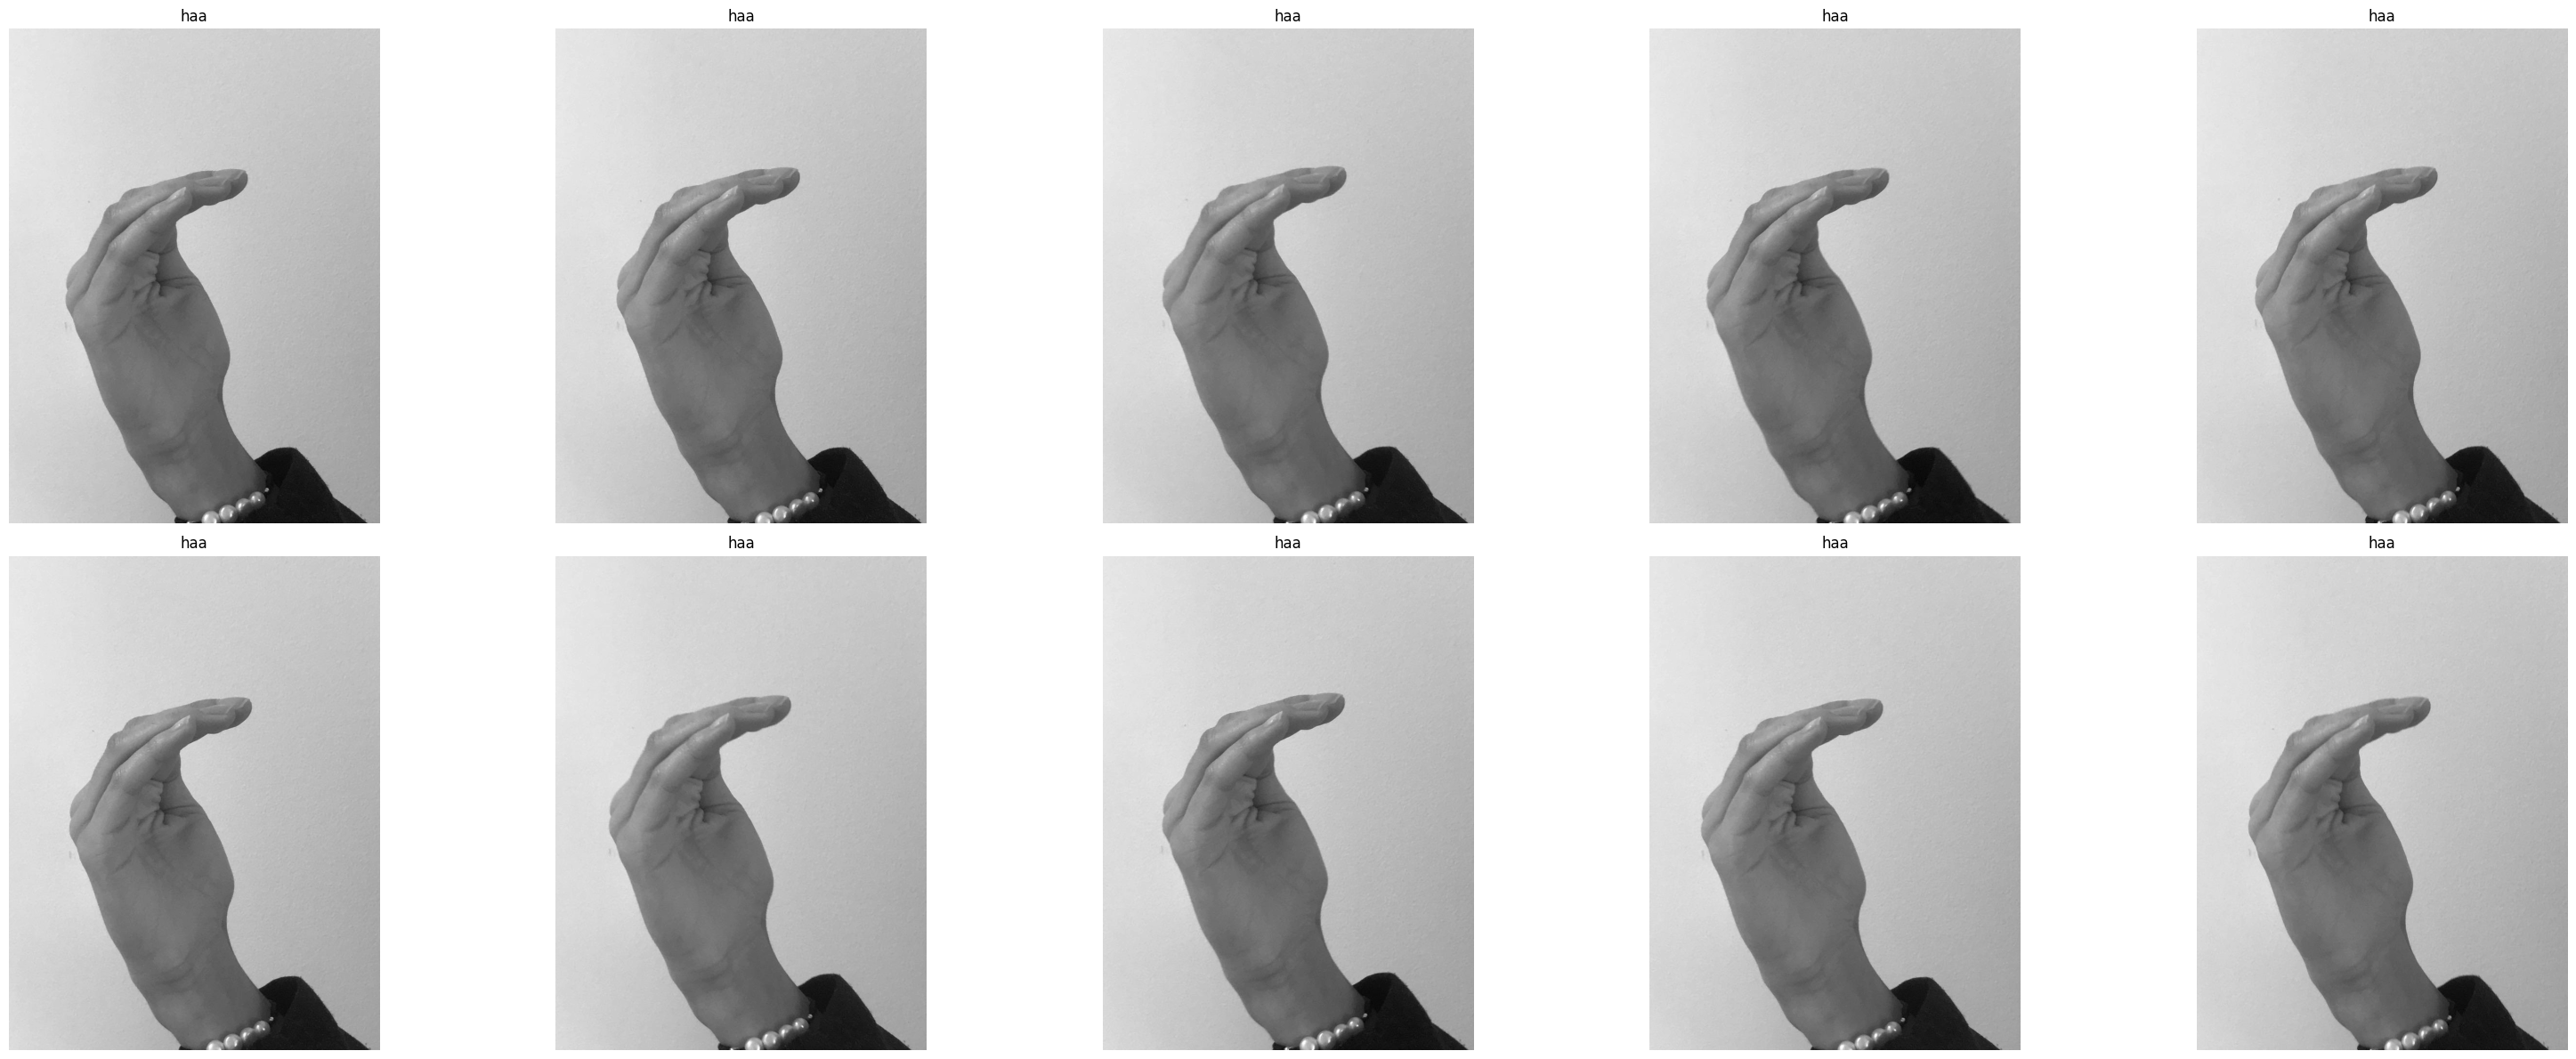

In [ ]:
#reduce the dataframe to the rows that have a different aspect ratio than 1
df_asp = df.loc[df['aspect_ratio'] != 1]

# Define the number of columns in the figure
num_cols = 5

# Calculate the number of rows needed
num_rows = len(df_asp) // num_cols

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 12))

# Flatten the axes array for ease of iteration
axes = axes.flatten()

# Loop through each image in the DataFrame and display it
for i, (_, row) in enumerate(df_asp.iterrows()):
    img = row['image']
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(row['label'])
    ax.axis('off')
    
# Remove any unused axes
for i in range(len(df), num_rows * num_cols):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label):\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

648
That is 1.20% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label):

kaaf: 320 (18.04%)
meem: 318 (18.02%)
haa: 10 (0.66%)


In [ ]:
# Color Channel Analysis
def get_channel_means(image):
    return np.mean(np.array(image))
# Initialize a list to store the mean pixel intensity of each color channel
channel_means = []

# Loop through the images in the dataset and calculate the channel means
for i in range(len(df)):
    image = df['image'][i]
    channel_means.append(get_channel_means(image))

# Convert the channel means to a numpy array and calculate the mean and standard deviation for the channel
channel_means = np.array(channel_means)
mean_intensity = np.mean(channel_means)
std_intensity = np.std(channel_means)

# Print the mean and standard deviation for the channel
print("Mean pixel intensity: {:.2f}".format(mean_intensity))
print("Standard deviation of pixel intensity: {:.2f}".format(std_intensity))

Mean pixel intensity: 164.73
Standard deviation of pixel intensity: 45.94


## Preprocessing

In [ ]:
filtered_images = []

In [ ]:
# Check for Duplicates

def get_hash(img_path):
    """
    Calculates the MD5 checksum of the input image.

    Args:
        img_path (str): The file path of the input image.

    Returns:
        str: The MD5 checksum of the image.
    """
    # Open the input image in binary mode
    with open(img_path, "rb") as f:
        # Initialize a new MD5 hash object
        img_hash = hashlib.md5()
        # Read the image data in chunks and update the hash object with each chunk
        while chunk := f.read(8192):
           img_hash.update(chunk)
    # Return the hexadecimal representation of the hash value
    return img_hash.hexdigest()

In [ ]:
#Add a column to the DataFrame to store the hash values for each image in the dataset
df['hash'] = df['img_path'].apply(get_hash)

#Calculate the number of unique hash values in the dataset and identify duplicates based on the hash value
unique_values = df['hash'].nunique()
duplicates = df[df.duplicated(['hash'])]

#Print the number of duplicates found in the dataset
print("Duplicates in the Dataset based on the calculated hash value:")
print(len(duplicates), '\n')

#Print the total number of images in the dataset before dropping duplicates
print("Images in the Dataset before dropping Duplicates:")
print(len(df), '\n')

#Drop the duplicate images from the dataset based on the hash value and reset the index
df.drop_duplicates(subset=['hash'], inplace=True)
df = df.reset_index(drop=True)

#Print the total number of images in the dataset after dropping duplicates
print("Images in the Dataset after dropping Duplicates:")
print(len(df))

image_path = duplicates['img_path']
print(image_path)
for path in image_path:
  filtered_images.append(path)

print(len(filtered_images))

Duplicates in the Dataset based on the calculated hash value:
5670 

Images in the Dataset before dropping Duplicates:
54049 

Images in the Dataset after dropping Duplicates:
48379
465      /content/MachineLearning/Dataset/ArASL_Databas...
944      /content/MachineLearning/Dataset/ArASL_Databas...
1373     /content/MachineLearning/Dataset/ArASL_Databas...
1381     /content/MachineLearning/Dataset/ArASL_Databas...
1414     /content/MachineLearning/Dataset/ArASL_Databas...
                               ...                        
54009    /content/MachineLearning/Dataset/ArASL_Databas...
54029    /content/MachineLearning/Dataset/ArASL_Databas...
54033    /content/MachineLearning/Dataset/ArASL_Databas...
54037    /content/MachineLearning/Dataset/ArASL_Databas...
54038    /content/MachineLearning/Dataset/ArASL_Databas...
Name: img_path, Length: 5670, dtype: object
5670


In [ ]:
# Create an empty list to store the anomaly scores for each image
anomaly_scores = []

# Loop through each image in the dataset
for i in range(len(df)):
    # Load the image
    image = df.loc[i, 'image']
    
    # Calculate the mean and standard deviation of the image
    mean = np.mean(image)
    std = np.std(image)
    
    # Calculate the anomaly score
    anomaly_score = np.abs((image - mean) / std).mean()
    anomaly_scores.append(anomaly_score)

# Add the anomaly scores as a new column to the dataframe
df['anomaly_score'] = anomaly_scores

# Print the dataframe sorted by anomaly score
print(df.sort_values(by='anomaly_score', ascending=False))

                                                img_path  \
3833   /content/MachineLearning/Dataset/ArASL_Databas...   
3508   /content/MachineLearning/Dataset/ArASL_Databas...   
3006   /content/MachineLearning/Dataset/ArASL_Databas...   
2925   /content/MachineLearning/Dataset/ArASL_Databas...   
3035   /content/MachineLearning/Dataset/ArASL_Databas...   
...                                                  ...   
43419  /content/MachineLearning/Dataset/ArASL_Databas...   
29628  /content/MachineLearning/Dataset/ArASL_Databas...   
27672  /content/MachineLearning/Dataset/ArASL_Databas...   
27716  /content/MachineLearning/Dataset/ArASL_Databas...   
34027  /content/MachineLearning/Dataset/ArASL_Databas...   

                                                   image  label  aspect_ratio  \
3833   <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
3508   <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
3006   <PIL.Image.Image image mode=L

In [ ]:
#Filter out images with anomaly scores above 0.85
anomal_img = df.loc[df['anomaly_score'] >= 0.85]
df_filtered = df.loc[df['anomaly_score'] < 0.85]

#Reset the index to start from 0
df_filtered = df_filtered.reset_index(drop=True)

#Print the number of images in the filtered dataset
print('Number of pictures in the dataset after filtering:')
print(len(df_filtered))

image_path = anomal_img['img_path']
for path in image_path:
  filtered_images.append(path)

print(len(filtered_images))

Number of pictures in the dataset after filtering:
38645
15404


In [ ]:
# filter the images from the train and test directories
for image_path in filtered_images:
  os.remove(image_path)

In [ ]:
#!zip -r /content/MachineLearning/Dataset/filtered_Dataset.zip /content/MachineLearning/Dataset/ArASL_Database_54K_Final

In [ ]:
import os
import random
import shutil

# define the directory containing the images
original_dir = '/content/MachineLearning/Dataset/SignLanguage_filtered'

# define the directories for the training, validation, and test sets
train_dir = '/content/MachineLearning/Dataset/train_set'
val_dir = '/content/MachineLearning/Dataset/valid_set'
test_dir = '/content/MachineLearning/Dataset/test_set'

# create the directories for the training, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# define the size of the validation and test sets
val_size = 0.2
test_size = 0.2

# loop through the subdirectories in the original directory and copy the files to the train, validation, or test directories
for sub_dir in os.listdir(original_dir):
    sub_dir_path = os.path.join(original_dir, sub_dir)
    if not os.path.isdir(sub_dir_path):
        continue
    print(f'Processing {sub_dir_path}...')
    files = os.listdir(sub_dir_path)
    random.shuffle(files)
    num_files = len(files)
    num_val = int(val_size * num_files)
    num_test = int(test_size * num_files)
    num_train = num_files - num_val - num_test
    train_files = files[:num_train]
    val_files = files[num_train:num_train+num_val]
    test_files = files[num_train+num_val:]
    for filename in train_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(train_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
    for filename in val_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(val_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
    for filename in test_files:
        src = os.path.join(sub_dir_path, filename)
        dst = os.path.join(test_dir, sub_dir, filename)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

Processing /content/MachineLearning/Dataset/SignLanguage_filtered/khaa...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/haa...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/meem...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/aleff...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/ha...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/fa...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/dal...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/nun...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/toot...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/waw...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/zay...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/ain...
Processing /content/MachineLearning/Dataset/SignLanguage_filtered/gaaf...
Processing /content/MachineLearning/Dataset/Sig

In [4]:
#!zip -r /content/MachineLearning/Dataset/test_set.zip /content/MachineLearning/Dataset/test_set
# --> GitHub

In [3]:
#!zip -r /content/MachineLearning/Dataset/train_set.zip /content/MachineLearning/Dataset/train_set
# --> GitHub

In [2]:
#!zip -r /content/MachineLearning/Dataset/valid_set.zip /content/MachineLearning/Dataset/valid_set
# --> GitHub

## Data Augmentation on the training set

In [ ]:
path = "/content/MachineLearning/Dataset/train_set"

# loop through the folders and augment images
for folder in os.listdir(path):
    print(folder)
    if folder == '.DS_Store':
        continue
    else:
        folder_path = os.path.join(path, folder)
        print(folder_path)
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            else:
                file_path = os.path.join(folder_path, file)
                print(file_path)
                image = tf.keras.preprocessing.image.load_img(file_path)
                image = tf.keras.preprocessing.image.img_to_array(image)
                image = np.expand_dims(image, axis=0)
                image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=15,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )
                augmented_image_iterator = image_generator.flow(image, batch_size=1)
                augmented_image = next(augmented_image_iterator)
                augmented_image = augmented_image[0].astype('uint8')
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image)
                filename, extension = os.path.splitext(file)
                new_filename = filename + '_aug' + extension
                new_file_path = os.path.join(folder_path, new_filename)
                augmented_image.save(new_file_path)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1199).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1458).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1284).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (30).JPG
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (909).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (982).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1413).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (120).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (627).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (657).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (893).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (560).JPG
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1335).jpg
/content/MachineLearning/Dataset/train_set/sheen/SHEEN (1297).jpg
/content/MachineLe

In [1]:
#!zip -r /content/MachineLearning/Dataset/train_set_augmented.zip /content/MachineLearning/Dataset/train_set
# --> GitHub

## Build Model

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#create imagegenerator and load images, taking some images to create validation and training dataset
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#create training dataset
train_generator = image_generator.flow_from_directory(
    '/content/MachineLearning/Dataset/train_set_augmented',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical') # set as training data
#create validation dataset
validation_generator = image_generator.flow_from_directory(
    '/content/MachineLearning/Dataset/valid_set', # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical') # set as validation data


#define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=40)

Found 46430 images belonging to 32 classes.
Found 7715 images belonging to 32 classes.
Epoch 1/5


<ipython-input-18-a4f095943cd7>:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 19s 183ms/step - loss: 3.4206 - accuracy: 0.0497 - val_loss: 3.2738 - val_accuracy: 0.1187
Epoch 2/5
100/100 [==============================] - 19s 192ms/step - loss: 2.9619 - accuracy: 0.1625 - val_loss: 2.5144 - val_accuracy: 0.3617
Epoch 3/5
100/100 [==============================] - 18s 179ms/step - loss: 2.2996 - accuracy: 0.3278 - val_loss: 1.8414 - val_accuracy: 0.5109
Epoch 4/5
100/100 [==============================] - 18s 181ms/step - loss: 1.8172 - accuracy: 0.4434 - val_loss: 1.5676 - val_accuracy: 0.6164
Epoch 5/5
100/100 [==============================] - 18s 179ms/step - loss: 1.5435 - accuracy: 0.5419 - val_loss: 1.2315 - val_accuracy: 0.7117


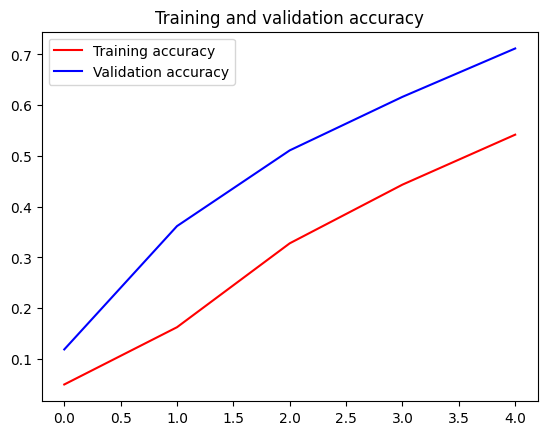

<Figure size 640x480 with 0 Axes>

In [21]:
#plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()